<a href="https://colab.research.google.com/github/sbotinaj/Data-Analytic-Colombia-Power-System/blob/main/MODELO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploración de datos iniciales

A continuación se realiza una exploración inicial de la base de datos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_path = '/content/DB_analitica.xlsx'

In [4]:
data_complete = pd.read_excel(data_path)

In [5]:
data_complete.head()

Electricity demand Colombia 2012 [MW]  \
0                                   5704   
1                                   5371   
2                                   5052   
3                                   4818   
4                                   4673   

   Electricity demand Colombia 2013 [MW]  \
0                                   5754   
1                                   5519   
2                                   5239   
3                                   4991   
4                                   4825   

   Electricity demand Colombia 2014 [MW]  \
0                             6237.74599   
1                             6006.22452   
2                             5723.68895   
3                             5468.91281   
4                             5254.70454   

   Electricity demand Colombia 2015 [MW]  \
0                                6069.88   
1                                5827.25   
2                                5574.38   
3                                5395.87   
4                                5258.90   

   Electricity demand Colombia 2016 [MW]  \
0                                6315.56   
1                                6139.46   
2                                5934.56   
3                                5715.72   
4                                5550.86   

   Daily natural water inflows time series 2006 [GW]  \
0                                              55.18   
1                                              59.73   
2                                              61.14   
3                                              79.21   
4                                              88.60   

   Daily natural water inflows time series 2007 [GW]  \
0                                              59.37   
1                                              70.43   
2                                              62.26   
3                                              62.29   
4                                              65.30   

   Daily natural water inflows time series 2008 [GW]  \
0                                              78.84   
1                                              81.24   
2                                              77.68   
3                                              75.56   
4                                              66.15   

   Daily natural water inflows time series 2009 [GW]  \
0                                              91.36   
1                                              80.43   
2                                             158.69   
3                                             168.00   
4                                              95.23   

   Daily natural water inflows time series 2010 [GW]  ...  \
0                                              45.62  ...   
1                                              43.10  ...   
2                                              43.40  ...   
3                                              40.41  ...   
4                                              41.19  ...   

   ExportsTotal 2012 MW  ExportsTotal 2013 MW  ExportsTotal 2014 MW  \
0                 10.66                  0.82                291.50   
1                  0.06                  0.36                291.23   
2                  1.22                  0.09                290.44   
3                  0.36                  0.12                274.12   
4                  1.15                  0.78                202.11   

   ExportsTotal 2015 MW  ExportsTotal 2016 MW  ImportsTotal 2012 MW  \
0                  0.74                  0.65                  0.00   
1                  0.00                  0.09                  0.87   
2                  1.27                  0.12                  0.00   
3                  0.00                  0.12                  0.00   
4                  0.83                  0.12                  0.00   

   ImportsTotal 2013 MW  ImportsTotal 2014 MW  ImportsTotal 2015 MW  \
0                  0.00               

In [6]:
data_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 36 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Electricity demand Colombia 2012 [MW]                8784 non-null   int64  
 1   Electricity demand Colombia 2013 [MW]                8784 non-null   int64  
 2   Electricity demand Colombia 2014 [MW]                8784 non-null   float64
 3   Electricity demand Colombia 2015 [MW]                8784 non-null   float64
 4   Electricity demand Colombia 2016 [MW]                8784 non-null   float64
 5   Daily natural water inflows time series 2006 [GW]    365 non-null    float64
 6   Daily natural water inflows time series 2007 [GW]    365 non-null    float64
 7   Daily natural water inflows time series 2008 [GW]    365 non-null    float64
 8   Daily natural water inflows time series 2009 [GW]    365 non-null   

# División de base de datos segun su tamaño

La base de datos original contiene dos tipos de datos, los datos por hora en un año, lo cual suman un total de 8784 registros, y los que son un promedio por día en cada año lo cual tienen un total de 365 registros

A continuación vamos a dividir la base de datos, dependiendo del número de registros

In [7]:
indices_8784 = data_complete.columns[data_complete.notnull().sum() == 8784].tolist()
print(indices_8784)


['Electricity demand Colombia 2012 [MW]', 'Electricity demand Colombia 2013 [MW]', 'Electricity demand Colombia 2014 [MW]', 'Electricity demand Colombia 2015 [MW]', 'Electricity demand Colombia 2016 [MW]', 'Hourly average hydropower generation ENSO-NINA [MW]', 'Hourly average hydropower generation ENSO-NINO [MW]', 'Hourly hydropower generation 2014 [MW]', ' Solar_generation_ENSO-NINO', 'Solar_generation_ENSO- NINA', 'Wind_generation_ENSO-NINO', 'Wind_generation_ENSO-NINA', 'Wind_generation_Colombia2014', 'Estimated Solar PV generation', ' Estimated Wind generation', 'ExportsTotal 2012 MW', 'ExportsTotal 2013 MW', 'ExportsTotal 2014 MW', 'ExportsTotal 2015 MW', 'ExportsTotal 2016 MW', 'ImportsTotal 2012 MW', 'ImportsTotal 2013 MW', 'ImportsTotal 2014 MW', 'ImportsTotal 2015 MW', 'ImportsTotal 2016 MW']


In [8]:
hours_data = data_complete[indices_8784]
hours_data.head()

Electricity demand Colombia 2012 [MW]  \
0                                   5704   
1                                   5371   
2                                   5052   
3                                   4818   
4                                   4673   

   Electricity demand Colombia 2013 [MW]  \
0                                   5754   
1                                   5519   
2                                   5239   
3                                   4991   
4                                   4825   

   Electricity demand Colombia 2014 [MW]  \
0                             6237.74599   
1                             6006.22452   
2                             5723.68895   
3                             5468.91281   
4                             5254.70454   

   Electricity demand Colombia 2015 [MW]  \
0                                6069.88   
1                                5827.25   
2                                5574.38   
3                                5395.87   
4                                5258.90   

   Electricity demand Colombia 2016 [MW]  \
0                                6315.56   
1                                6139.46   
2                                5934.56   
3                                5715.72   
4                                5550.86   

   Hourly average hydropower generation ENSO-NINA [MW]  \
0                                        4775.296765     
1                                        4540.974035     
2                                        4235.410985     
3                                        3936.844555     
4                                        3751.254080     

   Hourly average hydropower generation ENSO-NINO [MW]  \
0                                           2423.621     
1                                           2193.202     
2                                           1890.317     
3                                           1622.020     
4                                           1435.415     

   Hourly hydropower generation 2014 [MW]   Solar_generation_ENSO-NINO  \
0                              4224.64603                          0.0   
1                              3916.76549                          0.0   
2                              3649.41612                          0.0   
3                              3727.94469                          0.0   
4                              3584.21360                          0.0   

   Solar_generation_ENSO- NINA  ...  ExportsTotal 2012 MW  \
0                          0.0  ...                 10.66   
1                          0.0  ...                  0.06   
2                          0.0  ...                  1.22   
3                          0.0  ...                  0.36   
4                          0.0  ...                  1.15   

   ExportsTotal 2013 MW  ExportsTotal 2014 MW  ExportsTotal 2015 MW  \
0                  0.82                291.50                  0.74   
1                  0.36                291.23                  0.00   
2                  0.09                290.44                  1.27   
3                  0.12                274.12                  0.00   
4                  0.78                202.11                  0.83   

   ExportsTotal 2016 MW  ImportsTotal 2012 MW  ImportsTotal 2013 MW  \
0                  0.65                  0.00                  0.00   
1                  0.09                  0.87                  0.00   
2                  0.12                  0.00                  0.50   
3                  0.12                  0.00                  1.05   
4                  0.12                  0.00                  0.00   

   ImportsTotal 2014 MW  ImportsTotal 2015 MW  ImportsTotal 2016 MW  
0                   0.0                  0.00                  0.00  
1                   0.0                  0.24                  0.92  
2                   0.0                  0.00                  0.79  
3                   0.0           

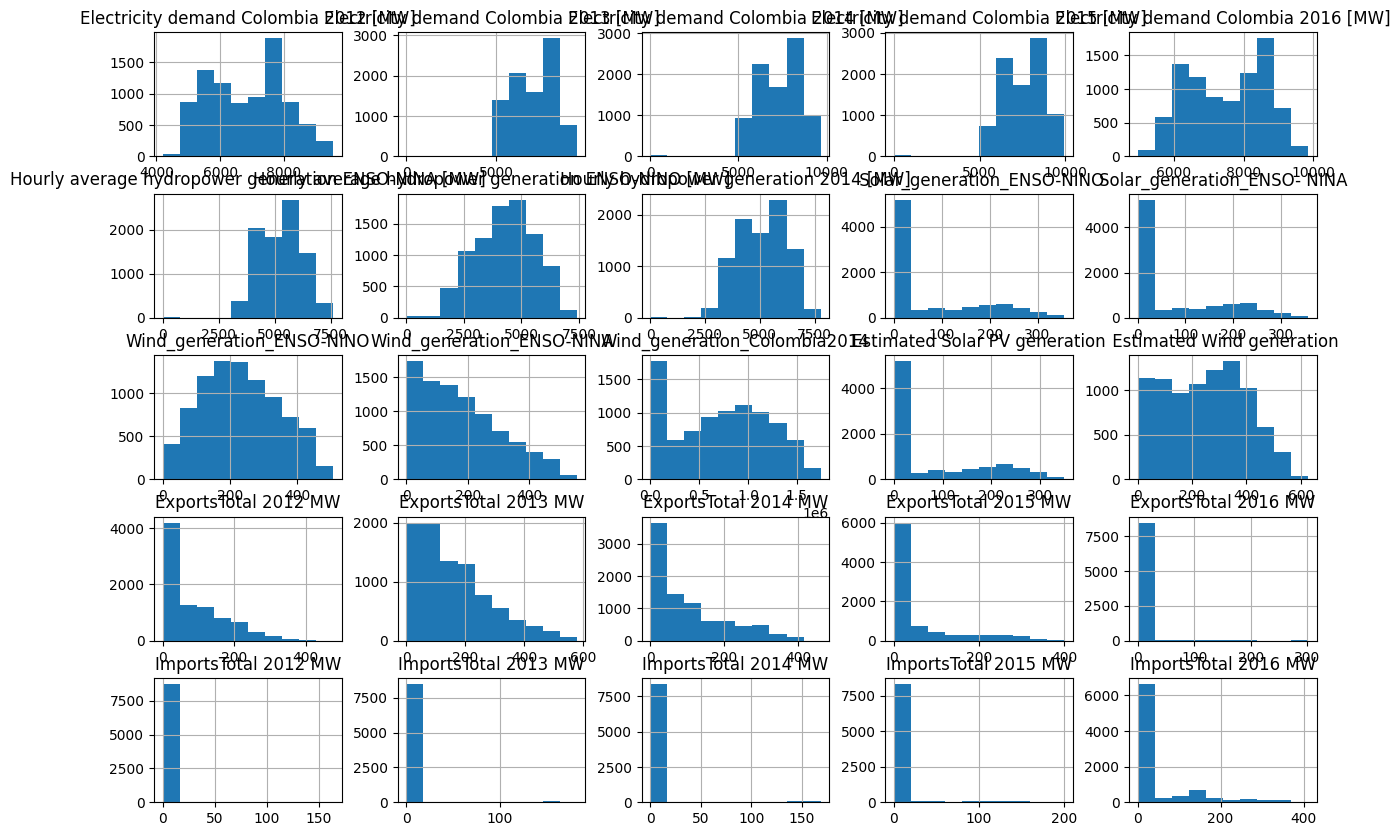

In [9]:
# prompt: plotea la distribucción de la base de datos hours_data

hours_data.hist(figsize=(15, 10),bins=10)
plt.show()


In [10]:
other_data = data_complete.drop(indices_8784, axis=1)
# Ordenamos los indices
other_data = other_data.reindex(sorted(other_data.columns), axis=1)
other_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 11 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Daily natural water inflows time series 2006 [GW]  365 non-null    float64
 1   Daily natural water inflows time series 2007 [GW]  365 non-null    float64
 2   Daily natural water inflows time series 2008 [GW]  365 non-null    float64
 3   Daily natural water inflows time series 2009 [GW]  365 non-null    float64
 4   Daily natural water inflows time series 2010 [GW]  365 non-null    float64
 5   Daily natural water inflows time series 2011 [GW]  365 non-null    float64
 6   Daily natural water inflows time series 2012 [GW]  365 non-null    float64
 7   Daily natural water inflows time series 2013 [GW]  365 non-null    float64
 8   Daily natural water inflows time series 2014 [GW]  365 non-null    float64
 9   Daily na

In [11]:
hours_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 25 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Electricity demand Colombia 2012 [MW]                8784 non-null   int64  
 1   Electricity demand Colombia 2013 [MW]                8784 non-null   int64  
 2   Electricity demand Colombia 2014 [MW]                8784 non-null   float64
 3   Electricity demand Colombia 2015 [MW]                8784 non-null   float64
 4   Electricity demand Colombia 2016 [MW]                8784 non-null   float64
 5   Hourly average hydropower generation ENSO-NINA [MW]  8784 non-null   float64
 6   Hourly average hydropower generation ENSO-NINO [MW]  8784 non-null   float64
 7   Hourly hydropower generation 2014 [MW]               8784 non-null   float64
 8    Solar_generation_ENSO-NINO                          8784 non-null  

In [12]:
hours_dataSort = hours_data.iloc[:, [i for i in range(7,12)] + [i for i in range(17, 20)]]
hours_dataSort


Hourly hydropower generation 2014 [MW]   Solar_generation_ENSO-NINO  \
0                                 4224.64603                          0.0   
1                                 3916.76549                          0.0   
2                                 3649.41612                          0.0   
3                                 3727.94469                          0.0   
4                                 3584.21360                          0.0   
...                                      ...                          ...   
8779                                 0.00100                          0.0   
8780                                 0.00100                          0.0   
8781                                 0.00100                          0.0   
8782                                 0.00100                          0.0   
8783                                 0.00100                          0.0   

      Solar_generation_ENSO- NINA  Wind_generation_ENSO-NINO  \
0                             0.0                     326.84   
1                             0.0                     302.41   
2                             0.0                     299.31   
3                             0.0                     297.58   
4                             0.0                     298.66   
...                           ...                        ...   
8779                          0.0                       0.00   
8780                          0.0                       0.00   
8781                          0.0                       0.00   
8782                          0.0                       0.00   
8783                          0.0                       0.00   

      Wind_generation_ENSO-NINA  ExportsTotal 2014 MW  ExportsTotal 2015 MW  \
0                        213.52                291.50                  0.74   
1                        249.61                291.23                  0.00   
2                        231.98                290.44                  1.27   
3                        262.41                274.12                  0.00   
4                        216.02                202.11                  0.83   
...                         ...                   ...                   ...   
8779                       0.00                  0.00                  0.00   
8780                       0.00                  0.00                  0.00   
8781                       0.00                  0.00                  0.00   
8782                       0.00                  0.00                  0.00   
8783                       0.00                  0.00                  0.00   

      ExportsTotal 2016 MW  
0                     0.65  
1                     0.09  
2                     0.12  
3                     0.12  
4                     0.12  
...                    ...  
8779                  0.00  
8780                  0.00  
8781                  0.00  
8782                  0.00  
8783                  0.00  

[8784 rows x 8 columns]

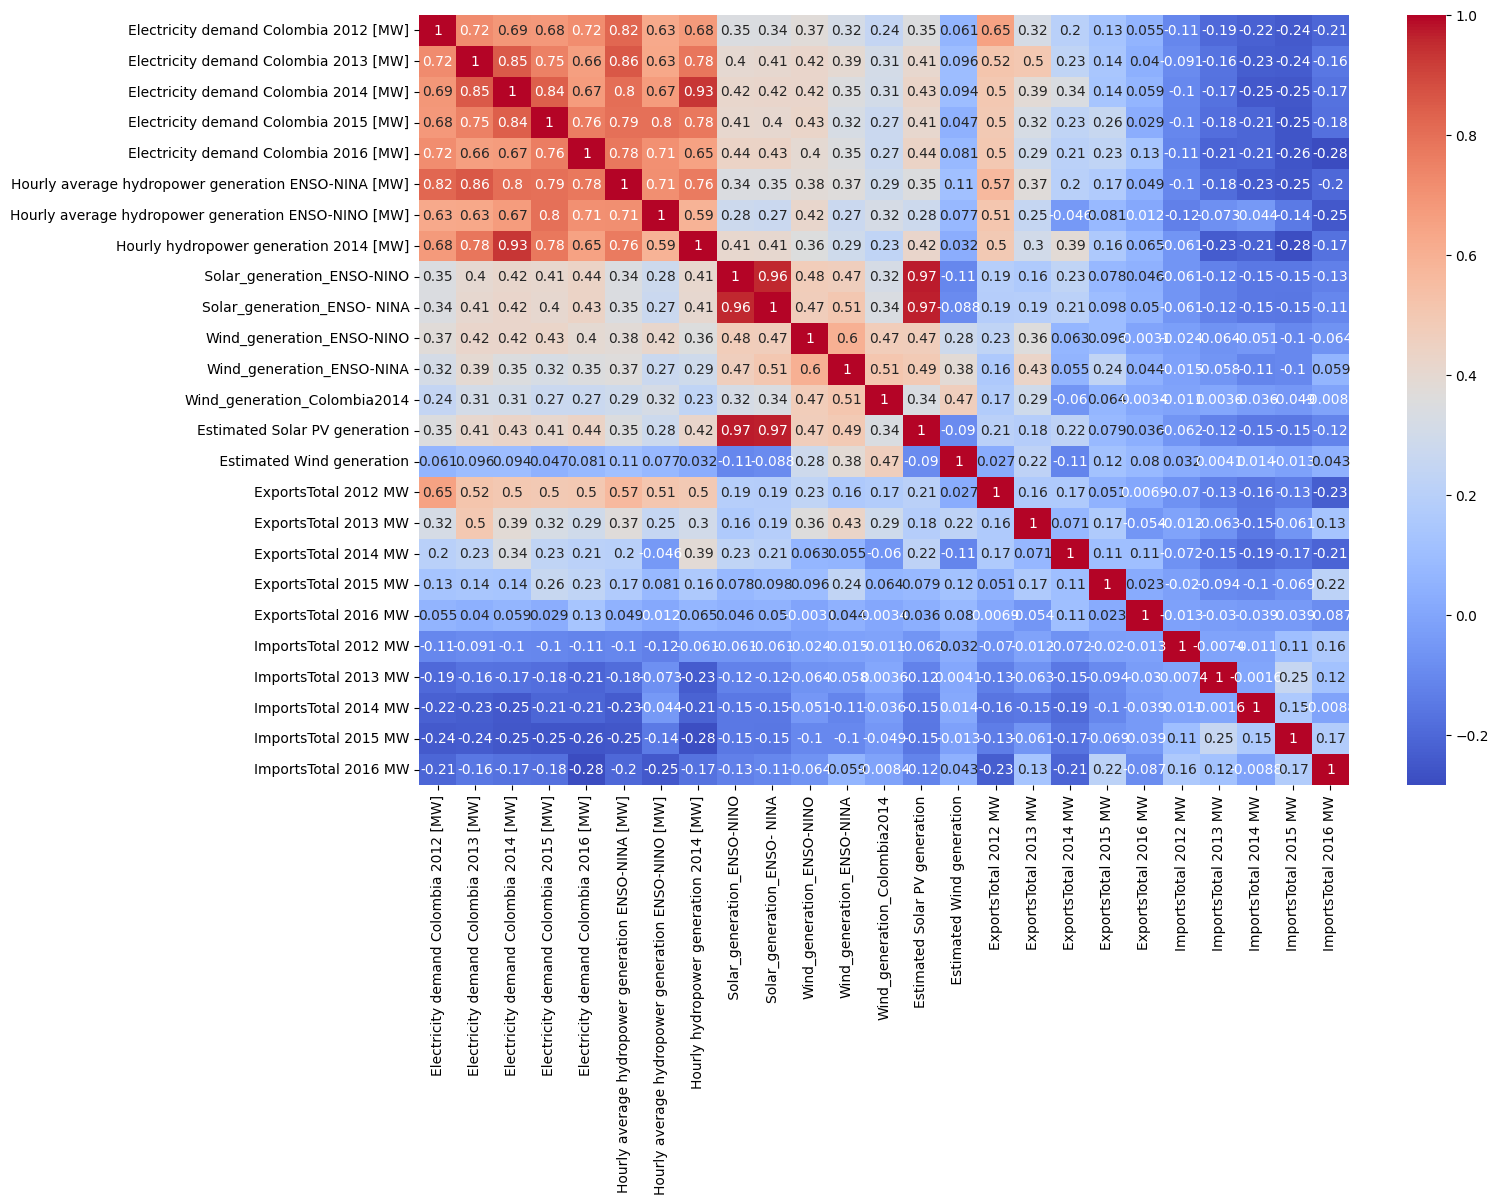

In [13]:
plt.figure(figsize=(15, 10))
sns.heatmap(hours_data.corr(), annot=True, cmap='coolwarm')
plt.show()

Observamos una correlación bastante grande con la generación hidrica vs la demanda del 2014, lo cual tienen todo el sentido, por ser del mismo año y ser variables estrechamente relacionadas

In [14]:
other_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 11 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Daily natural water inflows time series 2006 [GW]  365 non-null    float64
 1   Daily natural water inflows time series 2007 [GW]  365 non-null    float64
 2   Daily natural water inflows time series 2008 [GW]  365 non-null    float64
 3   Daily natural water inflows time series 2009 [GW]  365 non-null    float64
 4   Daily natural water inflows time series 2010 [GW]  365 non-null    float64
 5   Daily natural water inflows time series 2011 [GW]  365 non-null    float64
 6   Daily natural water inflows time series 2012 [GW]  365 non-null    float64
 7   Daily natural water inflows time series 2013 [GW]  365 non-null    float64
 8   Daily natural water inflows time series 2014 [GW]  365 non-null    float64
 9   Daily na

In [15]:
other_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 11 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Daily natural water inflows time series 2006 [GW]  365 non-null    float64
 1   Daily natural water inflows time series 2007 [GW]  365 non-null    float64
 2   Daily natural water inflows time series 2008 [GW]  365 non-null    float64
 3   Daily natural water inflows time series 2009 [GW]  365 non-null    float64
 4   Daily natural water inflows time series 2010 [GW]  365 non-null    float64
 5   Daily natural water inflows time series 2011 [GW]  365 non-null    float64
 6   Daily natural water inflows time series 2012 [GW]  365 non-null    float64
 7   Daily natural water inflows time series 2013 [GW]  365 non-null    float64
 8   Daily natural water inflows time series 2014 [GW]  365 non-null    float64
 9   Daily na

In [16]:
day_data = other_data

In [17]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 11 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Daily natural water inflows time series 2006 [GW]  365 non-null    float64
 1   Daily natural water inflows time series 2007 [GW]  365 non-null    float64
 2   Daily natural water inflows time series 2008 [GW]  365 non-null    float64
 3   Daily natural water inflows time series 2009 [GW]  365 non-null    float64
 4   Daily natural water inflows time series 2010 [GW]  365 non-null    float64
 5   Daily natural water inflows time series 2011 [GW]  365 non-null    float64
 6   Daily natural water inflows time series 2012 [GW]  365 non-null    float64
 7   Daily natural water inflows time series 2013 [GW]  365 non-null    float64
 8   Daily natural water inflows time series 2014 [GW]  365 non-null    float64
 9   Daily na

<Axes: >

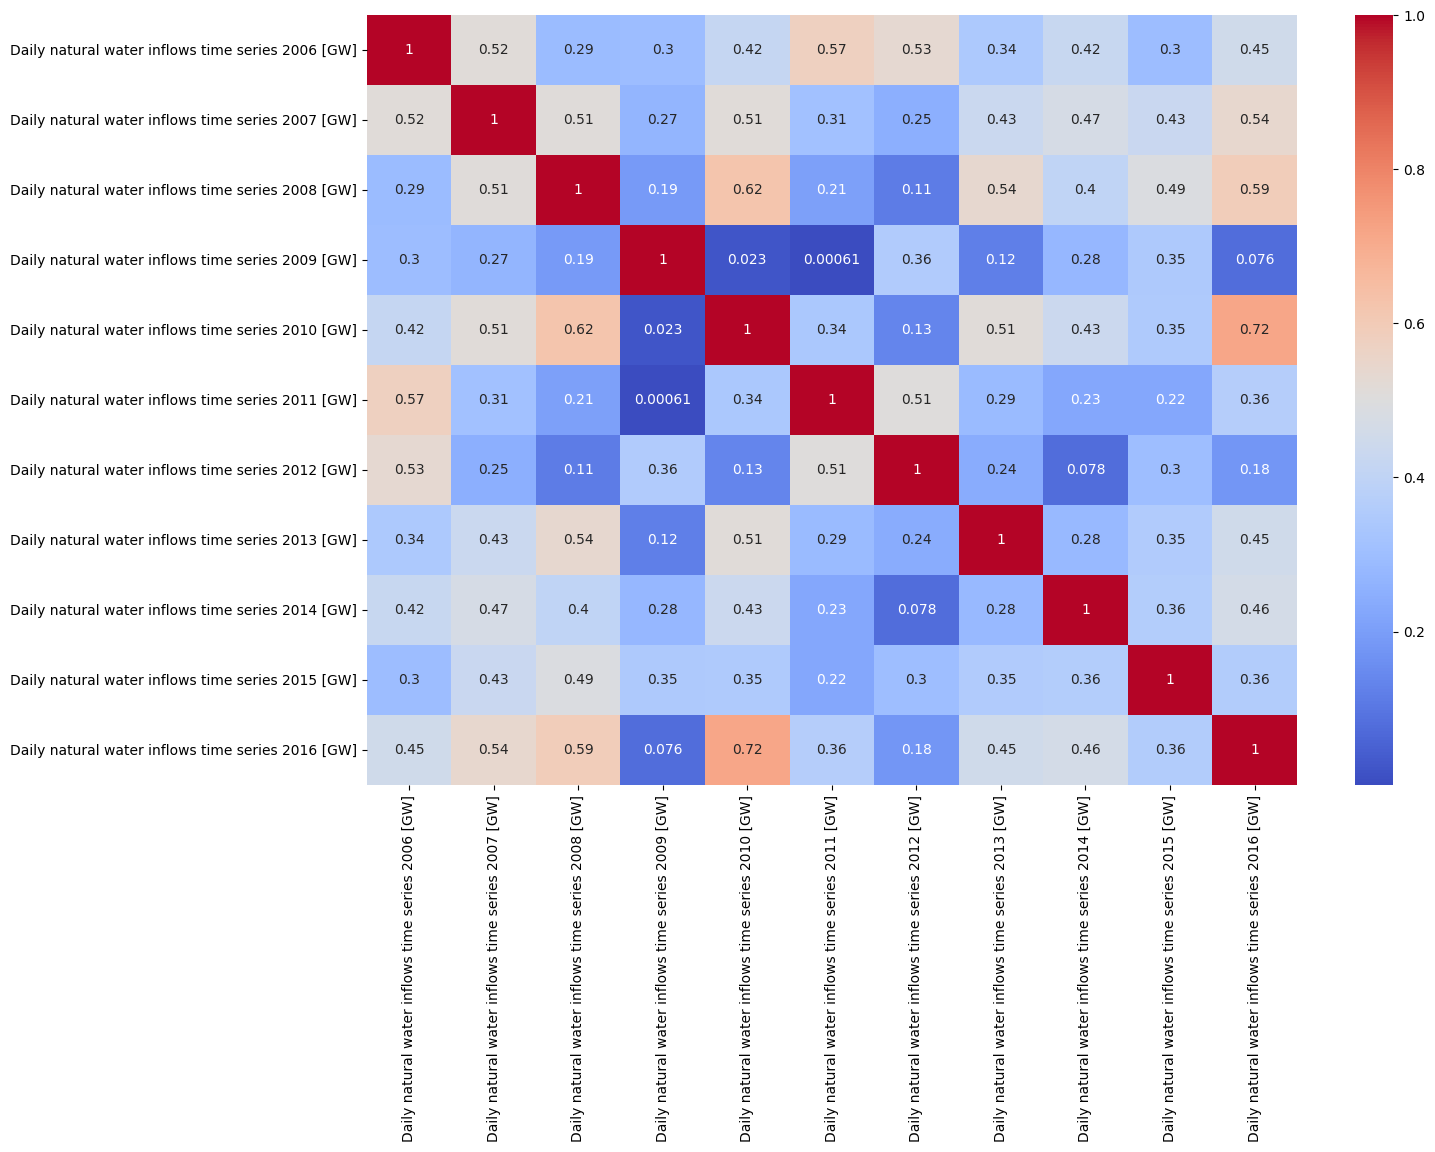

In [18]:
plt.figure(figsize=(15, 10))
sns.heatmap(day_data.corr(), annot=True, cmap='coolwarm')

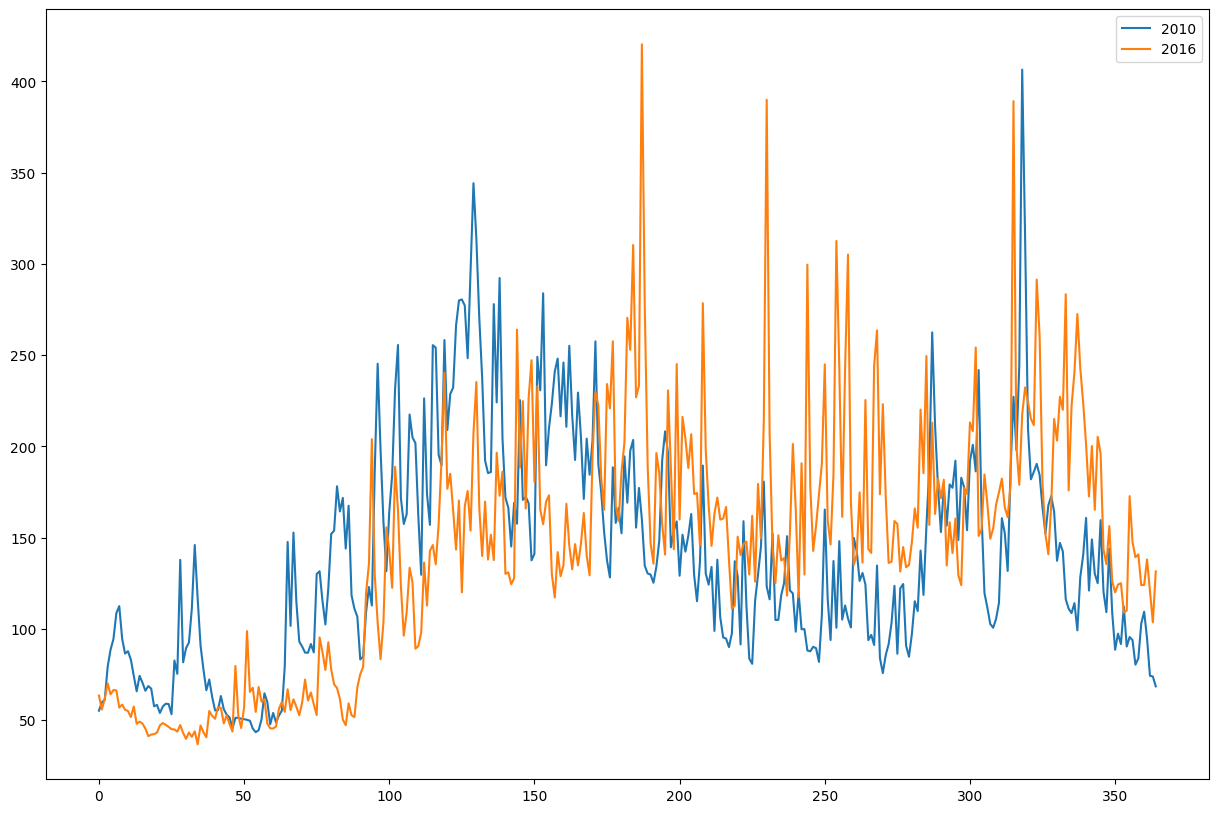

In [19]:
plt.figure(figsize=(15, 10))
plt.plot(day_data['Daily natural water inflows time series 2006 [GW]'])
plt.plot(day_data['Daily natural water inflows time series 2016 [GW]'])
plt.legend(['2010', '2016'])
plt.show()

# Implementación de datos por hora a prodiados por día

In [20]:
hours_data_daily = hours_data.groupby(np.arange(len(hours_data)) // 24).mean()
#borrar el ultimo registro para que evitar los datos de años biciestos
hours_data_daily = hours_data_daily.iloc[:-1]
hours_data_daily.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 0 to 364
Data columns (total 25 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Electricity demand Colombia 2012 [MW]                365 non-null    float64
 1   Electricity demand Colombia 2013 [MW]                365 non-null    float64
 2   Electricity demand Colombia 2014 [MW]                365 non-null    float64
 3   Electricity demand Colombia 2015 [MW]                365 non-null    float64
 4   Electricity demand Colombia 2016 [MW]                365 non-null    float64
 5   Hourly average hydropower generation ENSO-NINA [MW]  365 non-null    float64
 6   Hourly average hydropower generation ENSO-NINO [MW]  365 non-null    float64
 7   Hourly hydropower generation 2014 [MW]               365 non-null    float64
 8    Solar_generation_ENSO-NINO                          365 non-null    float6

In [21]:
# Concatenar los DataFrames de datos diarios y por hora (agregados a diarios)
combined_daily_data = pd.concat([day_data, hours_data_daily], axis=1)
#drop data nula
combined_daily_data = combined_daily_data.dropna()

# Mostrar información del DataFrame combinado
combined_daily_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 0 to 364
Data columns (total 36 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Daily natural water inflows time series 2006 [GW]    365 non-null    float64
 1   Daily natural water inflows time series 2007 [GW]    365 non-null    float64
 2   Daily natural water inflows time series 2008 [GW]    365 non-null    float64
 3   Daily natural water inflows time series 2009 [GW]    365 non-null    float64
 4   Daily natural water inflows time series 2010 [GW]    365 non-null    float64
 5   Daily natural water inflows time series 2011 [GW]    365 non-null    float64
 6   Daily natural water inflows time series 2012 [GW]    365 non-null    float64
 7   Daily natural water inflows time series 2013 [GW]    365 non-null    float64
 8   Daily natural water inflows time series 2014 [GW]    365 non-null    float6

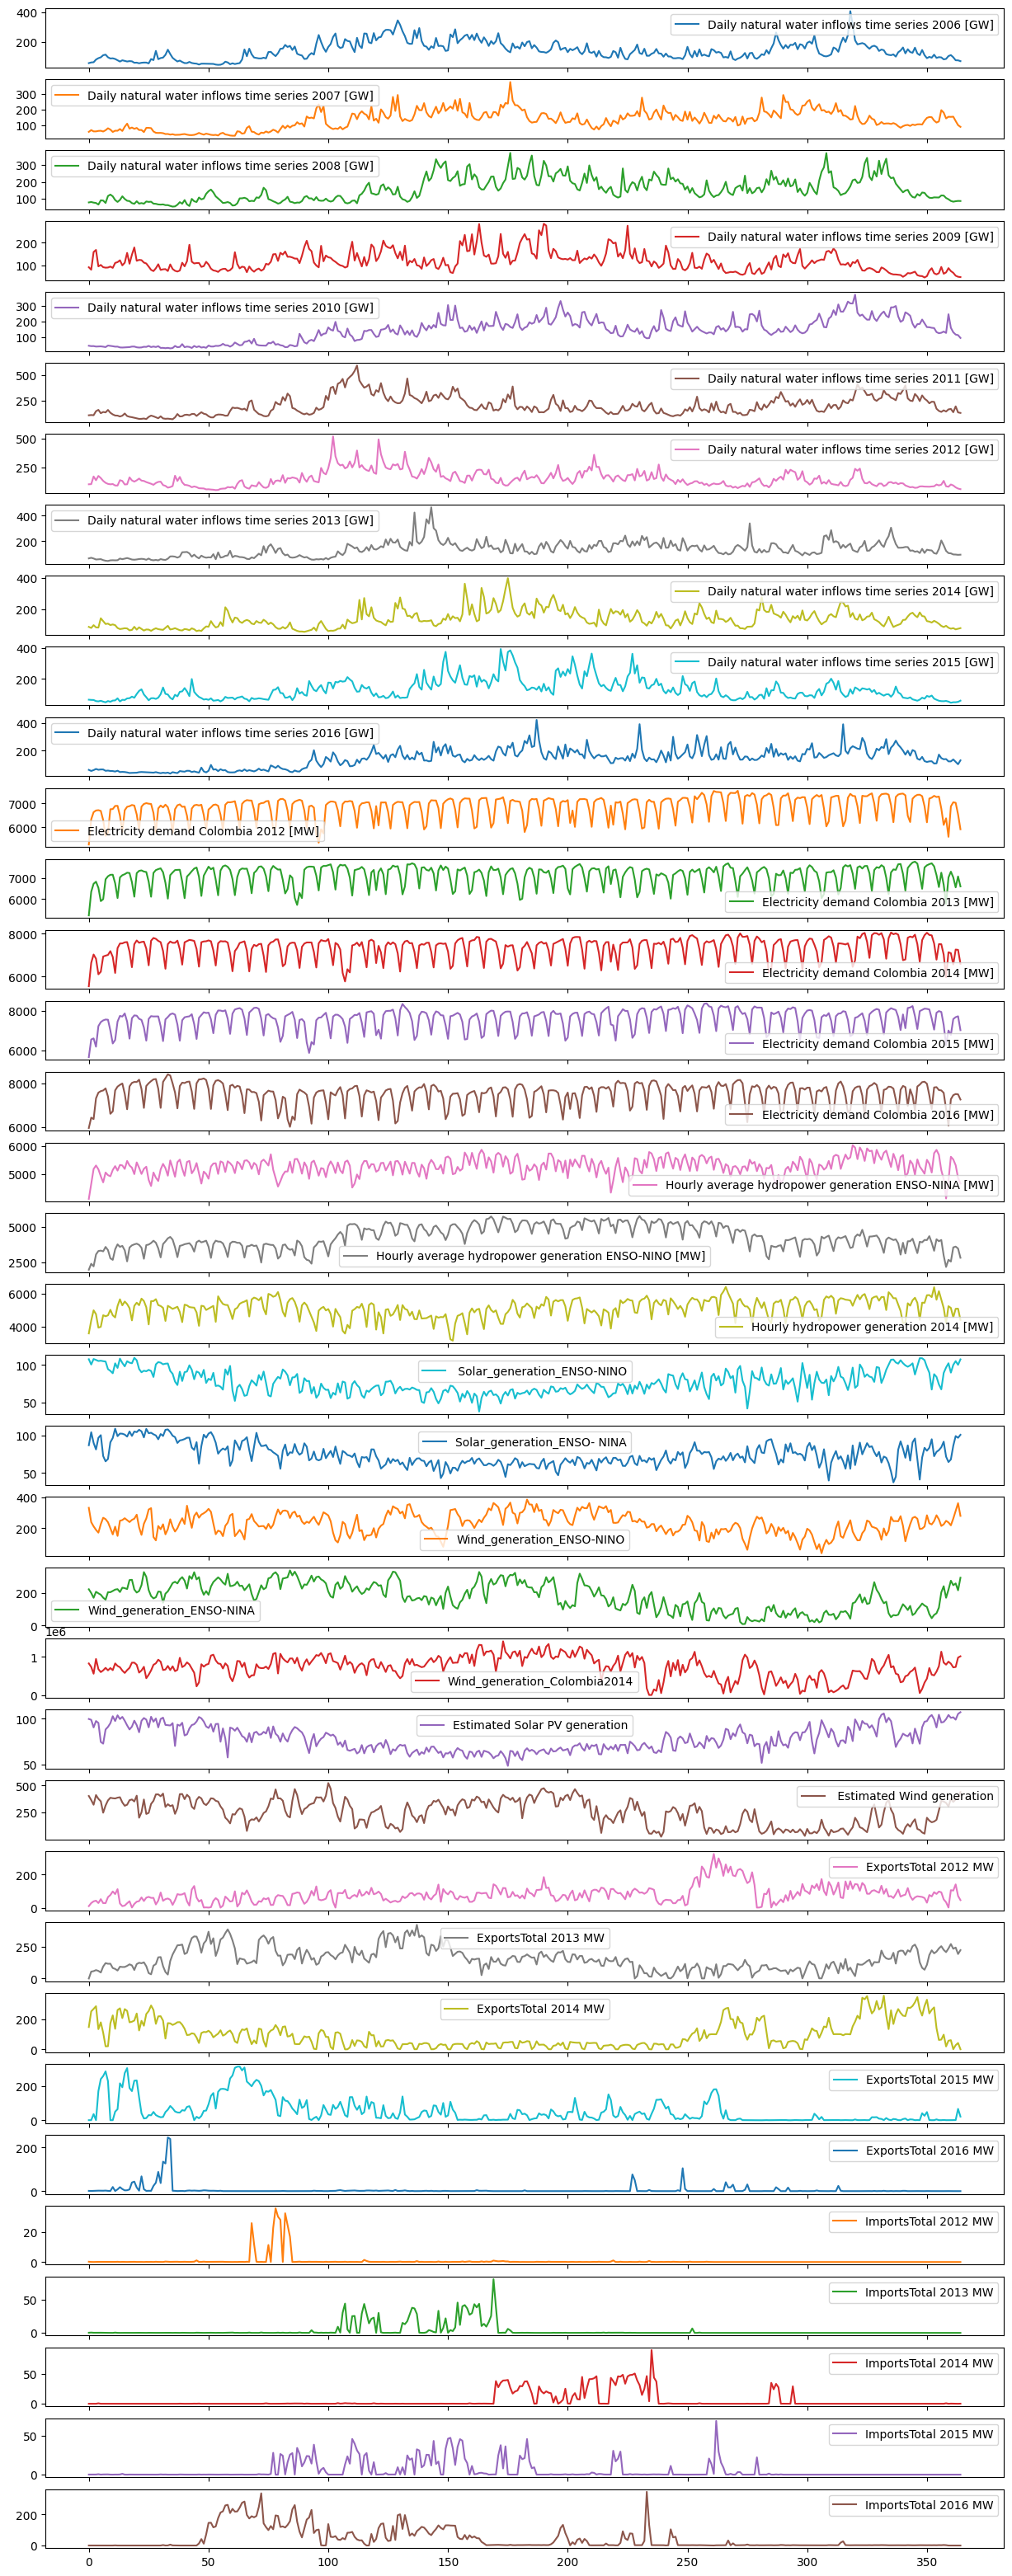

In [22]:
combined_daily_data.plot(subplots=True, figsize=(15, 40))
plt.show()

Observamos que no existe una relación extrecha entre los valores de año a año de las exportaciones, no poseen una estacionalidad visible.

Se realizará el modelo para las exportaciones, pero dado esta inspección anterior se toma tambien la medidad de realizar un modelo de predicción de la demanda, pues su estacionalidad es mucho más clara, y realizar la predicción de esta caracteristica sera mucho más preciso

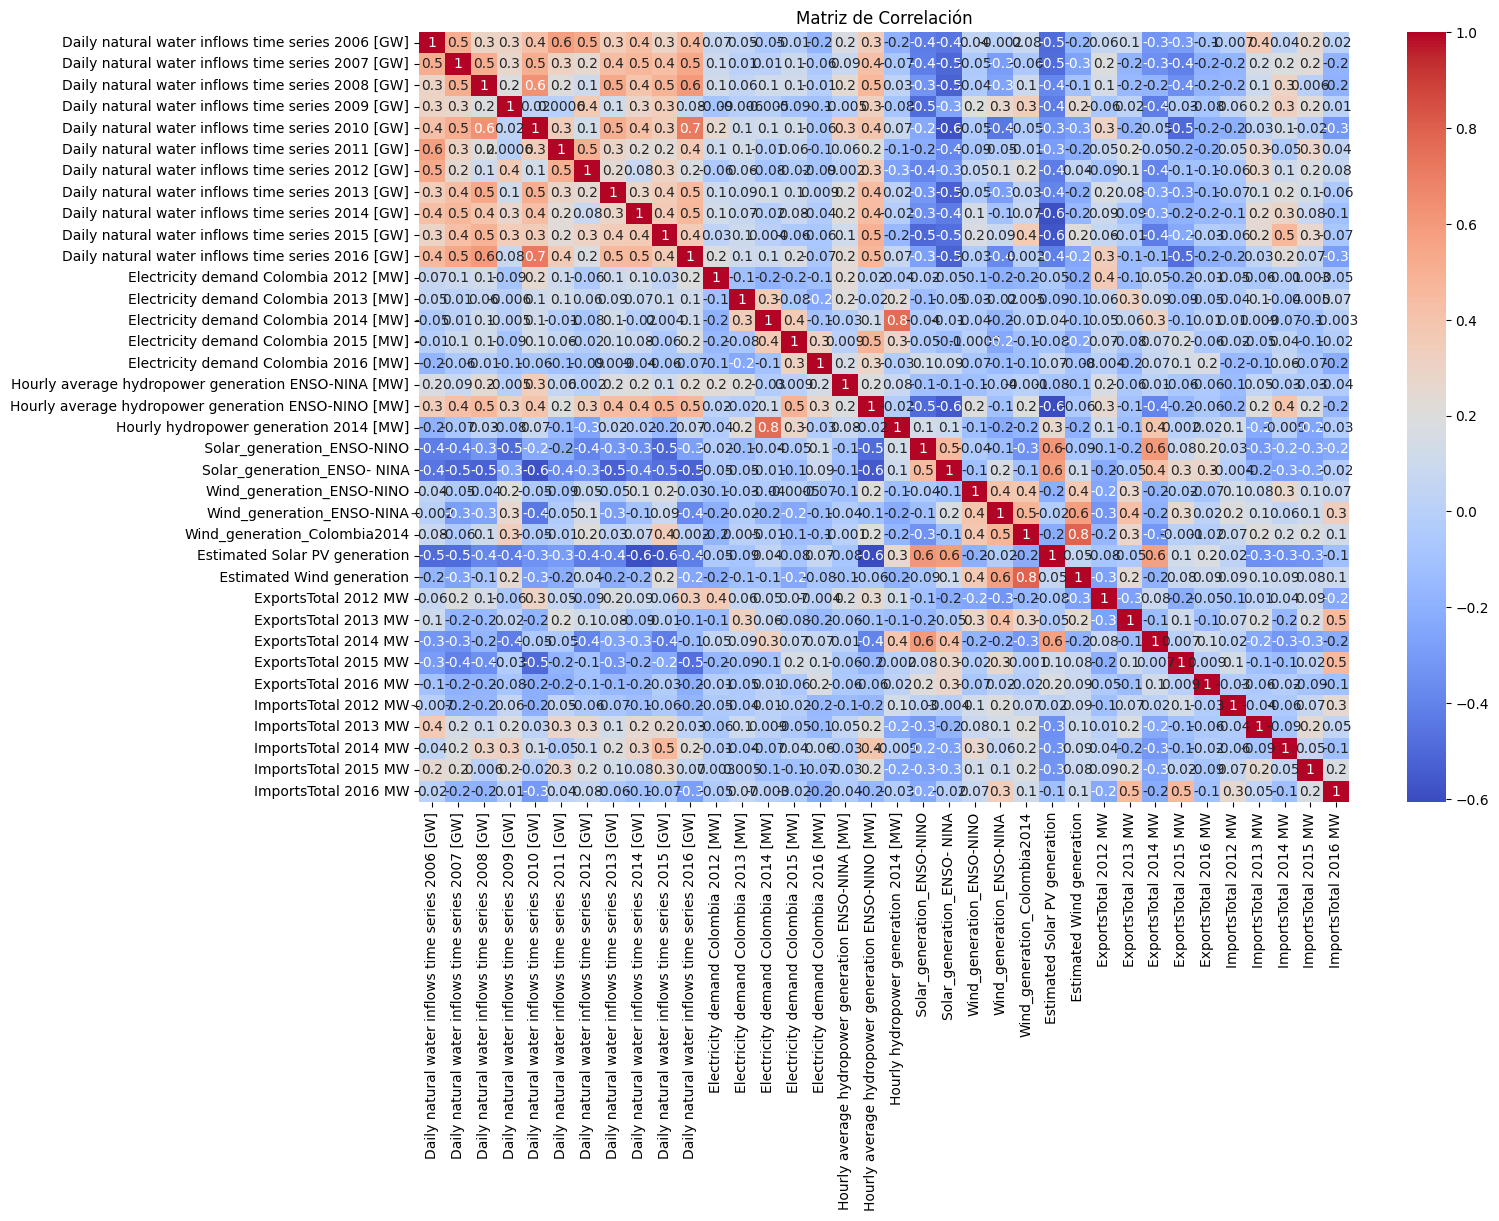

Correlaciones más fuertes:


In [23]:

# Calcular la matriz de correlación
correlation_matrix = combined_daily_data.corr()

# Mostrar la matriz de correlación
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt='.1g')
plt.title('Matriz de Correlación')
plt.show()

# Encontrar las correlaciones más fuertes (mayores a 0.7 o menores a -0.7)
#strong_correlations = correlation_matrix[abs(correlation_matrix) > 0.7]

# Mostrar las correlaciones más fuertes
print("Correlaciones más fuertes:")
#print(strong_correlations)


# Extracción de caracteristicas

El principal objetivo es realizar predcción de el promedio diaría de exportaciones, para ello entrenaremos nuestra modelos con datos del año 2024, ya que es el año que más caracteristicas tiene y además las predicciones de las exportaciones se validaran con los datos existentes para exportaciones en los años posteriores.

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [25]:
# random seed
np.random.seed(123)

In [26]:
Y = combined_daily_data['ExportsTotal 2015 MW']
x = combined_daily_data.iloc[:,0:28]
x=StandardScaler().fit_transform(x) # standarize the variables

Se reduciran las caracterisitcas a una sola, para usar modelos de ARIMA, que son univariables para series de tiempo

In [27]:
pca=PCA(n_components=1)
PC=pca.fit_transform(x)
principalDF=pd.DataFrame(data=PC,columns=['pc1'])
finalDf = pd.concat([principalDF, combined_daily_data[['ExportsTotal 2015 MW']]], axis = 1)
finalDf.head()

pc1  ExportsTotal 2015 MW
0  6.073251              0.950000
1  5.585436              0.989167
2  4.533998             36.321667
3  4.269025              1.155000
4  4.562126            169.906250

In [28]:
PCloadings = pca.components_.T * np.sqrt(pca.explained_variance_)
components=combined_daily_data.columns.tolist()
components=components[0:28]
loadingdf=pd.DataFrame(PCloadings)
loadingdf.rename(columns={0:"pc1"},inplace=True)
loadingdf["variable"]=components
loadingdf

pc1                                           variable
0  -0.669490  Daily natural water inflows time series 2006 [GW]
1  -0.729417  Daily natural water inflows time series 2007 [GW]
2  -0.701888  Daily natural water inflows time series 2008 [GW]
3  -0.378019  Daily natural water inflows time series 2009 [GW]
4  -0.729200  Daily natural water inflows time series 2010 [GW]
5  -0.497213  Daily natural water inflows time series 2011 [GW]
6  -0.457716  Daily natural water inflows time series 2012 [GW]
7  -0.653212  Daily natural water inflows time series 2013 [GW]
8  -0.641415  Daily natural water inflows time series 2014 [GW]
9  -0.642038  Daily natural water inflows time series 2015 [GW]
10 -0.744499  Daily natural water inflows time series 2016 [GW]
11 -0.169630              Electricity demand Colombia 2012 [MW]
12 -0.128981              Electricity demand Colombia 2013 [MW]
13 -0.072478              Electricity demand Colombia 2014 [MW]
14 -0.179139              Electricity demand Colombia 2015 [MW]
15  0.063506              Electricity demand Colombia 2016 [MW]
16 -0.276511  Hourly average hydropower generation ENSO-NINA...
17 -0.724798  Hourly average hydropower generation ENSO-NINO...
18  0.085273             Hourly hydropower generation 2014 [MW]
19  0.628886                         Solar_generation_ENSO-NINO
20  0.780473                        Solar_generation_ENSO- NINA
21 -0.051457                          Wind_generation_ENSO-NINO
22  0.233029                          Wind_generation_ENSO-NINA
23 -0.137078                       Wind_generation_Colombia2014
24  0.757078                      Estimated Solar PV generation
25  0.202304                          Estimated Wind generation
26 -0.280148                               ExportsTotal 2012 MW
27  0.052734                               ExportsTotal 2013 MW

In [29]:
fig=ex.bar(loadingdf,x="variable",y='pc1',color="variable")
#title
fig.update_layout(title_text="PCA Loadings")
fig.show()

In [30]:
#ponderación de caracteristas, ordenar de mayor a menor el dataframe
rank_features = loadingdf.sort_values(by='pc1',ascending=False)
rank_features_list = rank_features['variable'].tolist()
rank_features_list

['Solar_generation_ENSO- NINA',
 'Estimated Solar PV generation',
 ' Solar_generation_ENSO-NINO',
 'Wind_generation_ENSO-NINA',
 ' Estimated Wind generation',
 'Hourly hydropower generation 2014 [MW]',
 'Electricity demand Colombia 2016 [MW]',
 'ExportsTotal 2013 MW',
 'Wind_generation_ENSO-NINO',
 'Electricity demand Colombia 2014 [MW]',
 'Electricity demand Colombia 2013 [MW]',
 'Wind_generation_Colombia2014',
 'Electricity demand Colombia 2012 [MW]',
 'Electricity demand Colombia 2015 [MW]',
 'Hourly average hydropower generation ENSO-NINA [MW]',
 'ExportsTotal 2012 MW',
 'Daily natural water inflows time series 2009 [GW]',
 'Daily natural water inflows time series 2012 [GW]',
 'Daily natural water inflows time series 2011 [GW]',
 'Daily natural water inflows time series 2014 [GW]',
 'Daily natural water inflows time series 2015 [GW]',
 'Daily natural water inflows time series 2013 [GW]',
 'Daily natural water inflows time series 2006 [GW]',
 'Daily natural water inflows time series

<Axes: title={'center': 'Correlation Matrix'}>

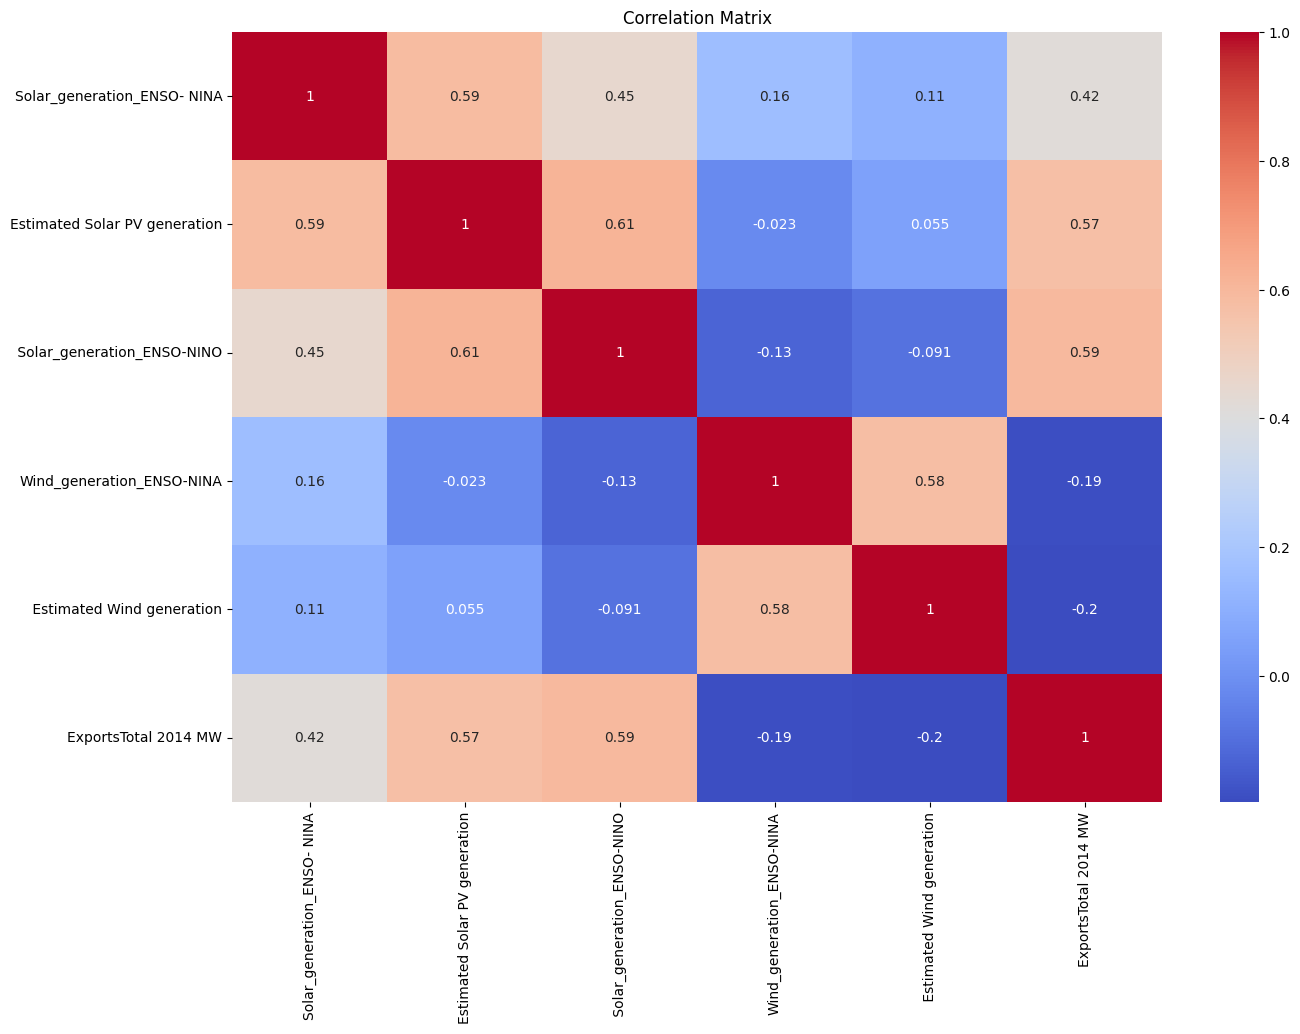

In [31]:
plt.figure(figsize=(15, 10))
data = pd.concat([combined_daily_data[rank_features_list[0:5]], combined_daily_data['ExportsTotal 2014 MW']], axis=1)
corr = data.corr()
plt.title('Correlation Matrix')
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Test de estacionalidad

In [32]:
# import the ADF test
from statsmodels.tsa.stattools import adfuller

# create a function that returns the necessary metrics to test stationarity
def test_stationarity(timeseries):
    dftest_initial = adfuller(timeseries)
    dfoutput_initial = pd.Series(dftest_initial[0:4],
                                 index=['Statistical Test',
                                        'p-value',
                                        '#Lags used',
                                        'Number of observations'
                                       ])

    for key, value in dftest_initial[4].items():
        dfoutput_initial['Critical value ' + key] = value

    print(dfoutput_initial)

test_stationarity(combined_daily_data['ExportsTotal 2014 MW'])

Statistical Test           -2.867715
p-value                     0.049233
#Lags used                 15.000000
Number of observations    349.000000
Critical value 1%          -3.449227
Critical value 5%          -2.869857
Critical value 10%         -2.571201
dtype: float64


# Time Series Forecasting

In [33]:
!pip install pmdarima

import pmdarima as pm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.5 MB/s eta 0:00:00


In [34]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [35]:
# Asegurarse de ajustar el escalador solo con los datos de entrenamiento
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

y_train = combined_daily_data['ExportsTotal 2014 MW']
y_test  = combined_daily_data['ExportsTotal 2015 MW']

# exogenous variables

exo_var_train = combined_daily_data[rank_features_list[0:5]]
exo_var_test = combined_daily_data[rank_features_list[0:5]]


In [36]:
365/2

182.5

In [37]:
#model arima whit exogenus variables

#model = pm.auto_arima(y_train, exogenous=exo_var_train, seasonal=True, m=24, stepwise=True, suppress_warnings=True)
model = SARIMAX(y_train, order=(1, 0, 5), seasonal_order=(1, 1, 0, 15), exog=exo_var_train)
model = model.fit()

In [38]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                ExportsTotal 2014 MW   No. Observations:                  365
Model:             SARIMAX(1, 0, 5)x(1, 1, [], 15)   Log Likelihood               -1845.354
Date:                             Tue, 01 Oct 2024   AIC                           3716.707
Time:                                     20:36:21   BIC                           3766.861
Sample:                                          0   HQIC                          3736.670
                                             - 365                                         
Covariance Type:                               opg                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Solar_generation_ENSO- NINA       0.1750      0.220      0.795      0.427      -0.257       0.606
Estimated Solar PV generation     0.1528      0.311      0.492      0.623      -0.456       0.762
 Solar_generation_ENSO-NINO      -0.0287      0.221     -0.130      0.897      -0.462       0.405
Wind_generation_ENSO-NINA        -0.0494      0.057     -0.869      0.385      -0.161       0.062
 Estimated Wind generation       -0.0458      0.037     -1.239      0.215      -0.118       0.027
ar.L1                             0.9099      0.039     23.281      0.000       0.833       0.987
ma.L1                            -0.1044      0.060     -1.738      0.082      -0.222       0.013
ma.L2                            -0.2077      0.057     -3.632      0.000      -0.320      -0.096
ma.L3                            -0.0290      0.054     -0.537      0.591      -0.135       0.077
ma.L4                             0.1320      0.053      2.503      0.012       0.029       0.235
ma.L5                            -0.0768      0.057     -1.349      0.177      -0.188       0.035
ar.S.L15                         -0.4478      0.052     -8.576      0.000      -0.550      -0.345
sigma2                         2196.7242    147.015     14.942      0.000    1908.580    2484.868
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                10.72
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.99   Skew:                             0.16
Prob(H) (two-sided):                  0.96   Kurtosis:                         3.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
#create forecasts on training set (to evaluate how the model behaves to known-training data)
y_train_forecast = model.predict(n_periods=len(y_train), exogenous=exo_var_train)
y_test_forecast = model.predict(n_periods=len(y_test), exogenous=exo_var_test)

In [40]:
rmse = np.sqrt(mean_squared_error(y_test, y_test_forecast))
print(f"RMSE on test set: {rmse}")

RMSE on test set: 120.77065538414332


In [41]:
y_test_forecast_iv = y_test_forecast.astype(float)
y_test_forecast_iv = y_test_forecast_iv.tolist()
y_test_forecast_iv = np.array(y_test_forecast_iv)

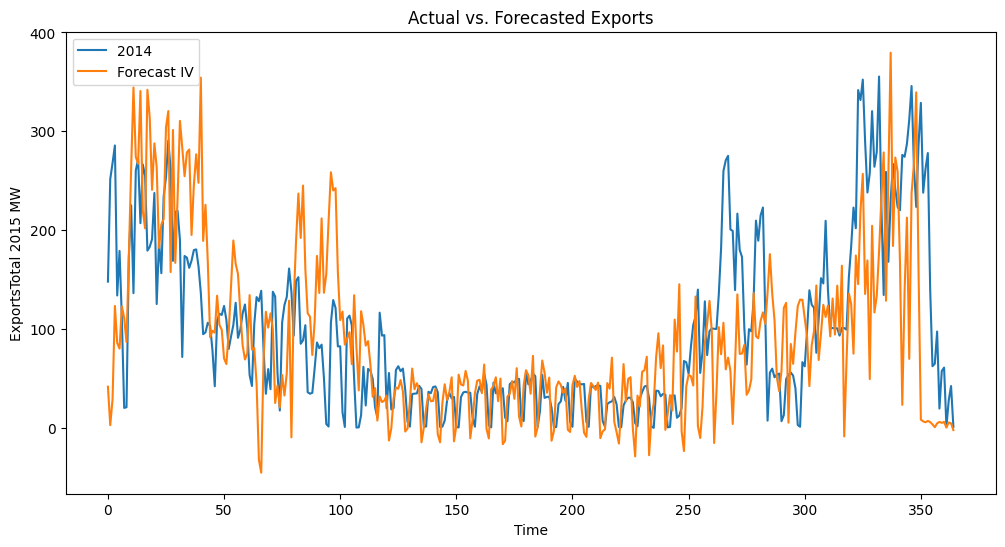

In [42]:
# plot y_test and predict values

plt.figure(figsize=(12, 6))
#plt.plot(y_test, label='Actual')
#plt.plot(y_test_forecast, label='Forecast')
plt.plot(combined_daily_data['ExportsTotal 2014 MW'],label = '2014')
plt.plot(y_test_forecast_iv[::-1], label='Forecast IV')
plt.title('Actual vs. Forecasted Exports')
plt.xlabel('Time')
plt.ylabel('ExportsTotal 2015 MW')
plt.legend()
plt.show()


#Modelo para demanda

In [45]:
Y = combined_daily_data['Electricity demand Colombia 2016 [MW]']
x = combined_daily_data.drop(['Electricity demand Colombia 2016 [MW]'], axis=1)
x=StandardScaler().fit_transform(x) # standarize the variables

In [46]:
pca=PCA(n_components=1)
PC=pca.fit_transform(x)
principalDF=pd.DataFrame(data=PC,columns=['pc1'])
finalDf = pd.concat([principalDF, combined_daily_data[['Electricity demand Colombia 2016 [MW]']]], axis = 1)
finalDf.head()

pc1  Electricity demand Colombia 2016 [MW]
0  5.518370                             5963.71625
1  5.467245                             6435.01000
2  4.675045                             6369.94750
3  4.276447                             7315.84750
4  4.580716                             7575.48375

In [51]:
PCloadings = pca.components_.T * np.sqrt(pca.explained_variance_)
components=combined_daily_data.columns.tolist()
components=components[0:35]
loadingdf=pd.DataFrame(PCloadings)
loadingdf.rename(columns={0:"pc1"},inplace=True)
loadingdf["variable"]=components
loadingdf

pc1                                           variable
0  -0.666699  Daily natural water inflows time series 2006 [GW]
1  -0.725466  Daily natural water inflows time series 2007 [GW]
2  -0.678658  Daily natural water inflows time series 2008 [GW]
3  -0.423712  Daily natural water inflows time series 2009 [GW]
4  -0.681328  Daily natural water inflows time series 2010 [GW]
5  -0.477250  Daily natural water inflows time series 2011 [GW]
6  -0.482645  Daily natural water inflows time series 2012 [GW]
7  -0.635549  Daily natural water inflows time series 2013 [GW]
8  -0.635179  Daily natural water inflows time series 2014 [GW]
9  -0.674477  Daily natural water inflows time series 2015 [GW]
10 -0.710846  Daily natural water inflows time series 2016 [GW]
11 -0.141804              Electricity demand Colombia 2012 [MW]
12 -0.108121              Electricity demand Colombia 2013 [MW]
13 -0.019639              Electricity demand Colombia 2014 [MW]
14 -0.127820              Electricity demand Colombia 2015 [MW]
15 -0.243100              Electricity demand Colombia 2016 [MW]
16 -0.726741  Hourly average hydropower generation ENSO-NINA...
17  0.154015  Hourly average hydropower generation ENSO-NINO...
18  0.659108             Hourly hydropower generation 2014 [MW]
19  0.777994                         Solar_generation_ENSO-NINO
20 -0.104433                        Solar_generation_ENSO- NINA
21  0.169354                          Wind_generation_ENSO-NINO
22 -0.198225                          Wind_generation_ENSO-NINA
23  0.780774                       Wind_generation_Colombia2014
24  0.129412                      Estimated Solar PV generation
25 -0.248627                          Estimated Wind generation
26  0.023629                               ExportsTotal 2012 MW
27  0.524969                               ExportsTotal 2013 MW
28  0.423904                               ExportsTotal 2014 MW
29  0.255914                               ExportsTotal 2015 MW
30  0.151262                               ExportsTotal 2016 MW
31 -0.335365                               ImportsTotal 2012 MW
32 -0.389644                               ImportsTotal 2013 MW
33 -0.304706                               ImportsTotal 2014 MW
34  0.118561                               ImportsTotal 2015 MW

In [52]:
fig=ex.bar(loadingdf,x="variable",y='pc1',color="variable")
#title
fig.update_layout(title_text="PCA Loadings")
fig.show()

In [53]:
#ponderación de caracteristas, ordenar de mayor a menor el dataframe
rank_features = loadingdf.sort_values(by='pc1',ascending=False)
rank_features_list = rank_features['variable'].tolist()
rank_features_list

['Wind_generation_Colombia2014',
 ' Solar_generation_ENSO-NINO',
 'Hourly hydropower generation 2014 [MW]',
 'ExportsTotal 2013 MW',
 'ExportsTotal 2014 MW',
 'ExportsTotal 2015 MW',
 'Wind_generation_ENSO-NINO',
 'Hourly average hydropower generation ENSO-NINO [MW]',
 'ExportsTotal 2016 MW',
 'Estimated Solar PV generation',
 'ImportsTotal 2015 MW',
 'ExportsTotal 2012 MW',
 'Electricity demand Colombia 2014 [MW]',
 'Solar_generation_ENSO- NINA',
 'Electricity demand Colombia 2013 [MW]',
 'Electricity demand Colombia 2015 [MW]',
 'Electricity demand Colombia 2012 [MW]',
 'Wind_generation_ENSO-NINA',
 'Electricity demand Colombia 2016 [MW]',
 ' Estimated Wind generation',
 'ImportsTotal 2014 MW',
 'ImportsTotal 2012 MW',
 'ImportsTotal 2013 MW',
 'Daily natural water inflows time series 2009 [GW]',
 'Daily natural water inflows time series 2011 [GW]',
 'Daily natural water inflows time series 2012 [GW]',
 'Daily natural water inflows time series 2014 [GW]',
 'Daily natural water inflow

<Axes: title={'center': 'Correlation Matrix'}>

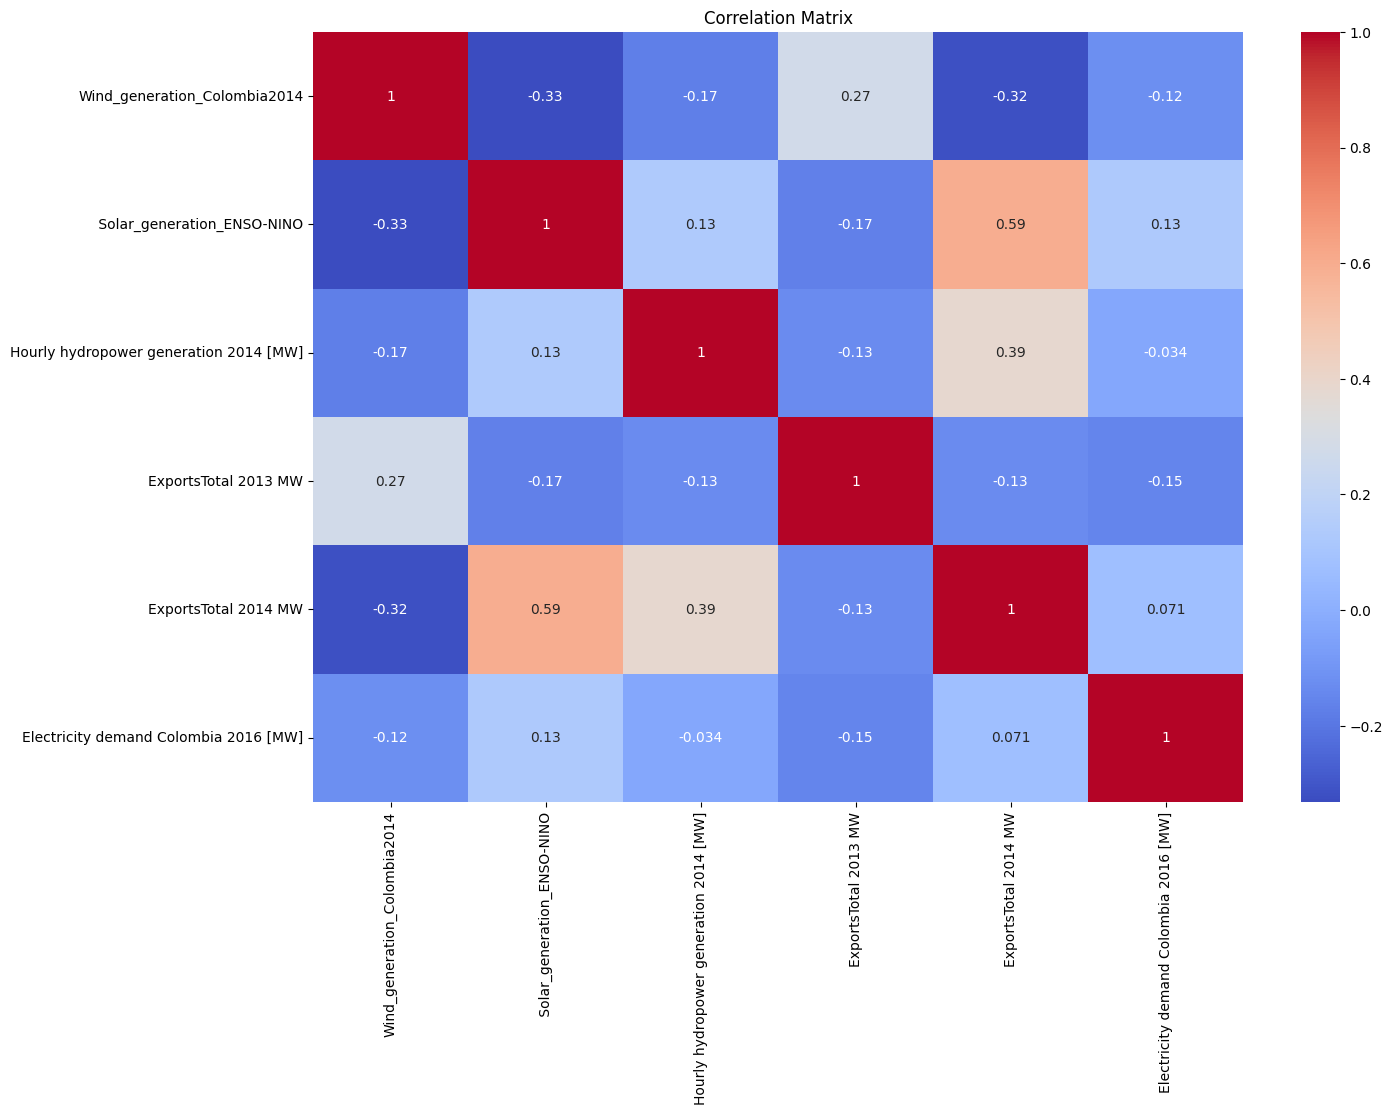

In [55]:
plt.figure(figsize=(15, 10))
data = pd.concat([combined_daily_data[rank_features_list[0:5]], combined_daily_data['Electricity demand Colombia 2016 [MW]']], axis=1)
corr = data.corr()
plt.title('Correlation Matrix')
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [74]:
# Asegurarse de ajustar el escalador solo con los datos de entrenamiento
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

y_train = combined_daily_data['Electricity demand Colombia 2016 [MW]']
y_test  = combined_daily_data['Electricity demand Colombia 2016 [MW]']

# exogenous variables

exo_var_train = pd.concat([combined_daily_data[rank_features_list[0:5]],combined_daily_data.iloc[:,11:14]], axis=1)
exo_var_test = pd.concat([combined_daily_data[rank_features_list[0:5]],combined_daily_data.iloc[:,11:14]], axis=1)


In [75]:
exo_var_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Wind_generation_Colombia2014            365 non-null    float64
 1    Solar_generation_ENSO-NINO             365 non-null    float64
 2   Hourly hydropower generation 2014 [MW]  365 non-null    float64
 3   ExportsTotal 2013 MW                    365 non-null    float64
 4   ExportsTotal 2014 MW                    365 non-null    float64
 5   Electricity demand Colombia 2012 [MW]   365 non-null    float64
 6   Electricity demand Colombia 2013 [MW]   365 non-null    float64
 7   Electricity demand Colombia 2014 [MW]   365 non-null    float64
dtypes: float64(8)
memory usage: 25.7 KB


In [76]:
#model arima whit exogenus variables

#model = pm.auto_arima(y_train, exogenous=exo_var_train, seasonal=True, m=24, stepwise=True, suppress_warnings=True)
model = SARIMAX(y_train, order=(1, 0, 5), seasonal_order=(1, 1, 0, 15), exog=exo_var_train)
model = model.fit()

In [77]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                         
=================================================================================================
Dep. Variable:     Electricity demand Colombia 2016 [MW]   No. Observations:                  365
Model:                   SARIMAX(1, 0, 5)x(1, 1, [], 15)   Log Likelihood               -2696.130
Date:                                   Tue, 01 Oct 2024   AIC                           5424.260
Time:                                           21:04:20   BIC                           5485.987
Sample:                                                0   HQIC                          5448.829
                                                   - 365                                         
Covariance Type:                                     opg                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Wind_generation_Colombia2014              -0.0001      0.000     -0.990      0.322      -0.000       0.000
 Solar_generation_ENSO-NINO               -0.4715      2.421     -0.195      0.846      -5.217       4.274
Hourly hydropower generation 2014 [MW]     0.0328      0.090      0.366      0.714      -0.143       0.208
ExportsTotal 2013 MW                      -0.2877      0.429     -0.671      0.502      -1.128       0.552
ExportsTotal 2014 MW                       1.0372      0.501      2.072      0.038       0.056       2.018
Electricity demand Colombia 2012 [MW]     -0.2910      0.067     -4.341      0.000      -0.422      -0.160
Electricity demand Colombia 2013 [MW]     -0.0318      0.069     -0.459      0.646      -0.168       0.104
Electricity demand Colombia 2014 [MW]     -0.3170      0.106     -2.995      0.003      -0.524      -0.110
ar.L1                                     -0.3947      0.111     -3.558      0.000      -0.612      -0.177
ma.L1                                      0.7264      0.098      7.428      0.000       0.535       0.918
ma.L2                                      0.1224      0.080      1.531      0.126      -0.034       0.279
ma.L3                                     -0.2048      0.060     -3.406      0.001      -0.323      -0.087
ma.L4                                      0.0403      0.059      0.677      0.498      -0.076       0.157
ma.L5                                      0.4616      0.055      8.408      0.000       0.354       0.569
ar.S.L15                                  -0.0779      0.039     -1.989      0.047      -0.155      -0.001
sigma2                                  3.024e+05   2.85e-05   1.06e+10      0.000    3.02e+05    3.02e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.83   Jarque-Bera (JB):                 6.79
Prob(Q):                              0.36   Prob(JB):                         0.03
Heteroskedasticity (H):               0.77   Skew:                             0.31
Prob(H) (two-sided):                  0.17   Kurtosis:                         2.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.03e+26. Standard errors may be unstable.
"""

In [78]:
#create forecasts on training set (to evaluate how the model behaves to known-training data)
y_train_forecast = model.predict(n_periods=len(y_train), exogenous=exo_var_train)
y_test_forecast = model.predict(n_periods=len(y_test), exogenous=exo_var_test)

In [79]:
rmse = np.sqrt(mean_squared_error(y_test, y_test_forecast))
print(f"RMSE on test set: {rmse}")

RMSE on test set: 2184.7262807357033


In [80]:
y_test_forecast_iv = y_test_forecast.astype(float)
y_test_forecast_iv = y_test_forecast_iv.tolist()
y_test_forecast_iv = np.array(y_test_forecast_iv)

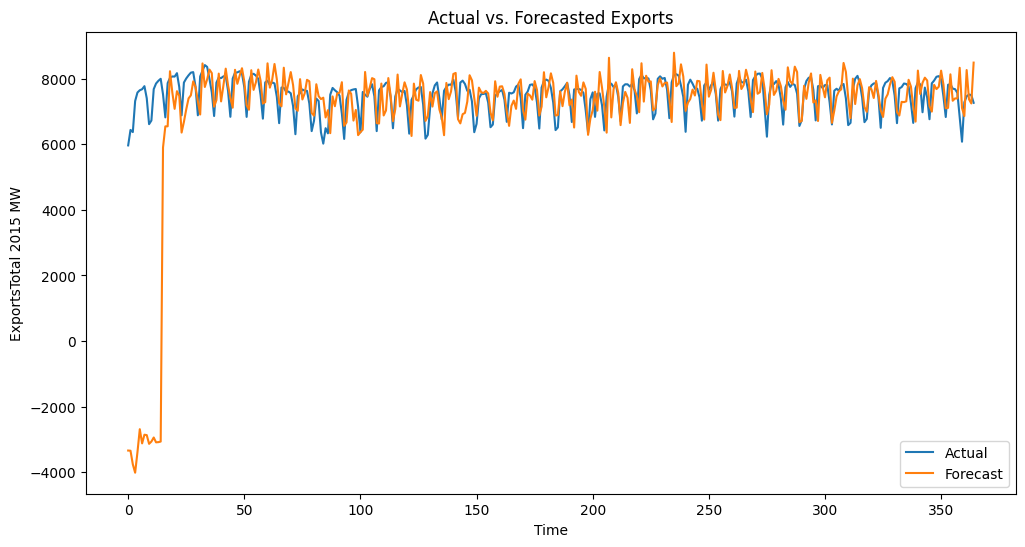

In [84]:
# plot y_test and predict values

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_test_forecast, label='Forecast')
plt.title('Actual vs. Forecasted Exports')
plt.xlabel('Time')
plt.ylabel('ExportsTotal 2015 MW')
plt.legend()
plt.show()

In [96]:

# Define las variables exógenas para la predicción
# Asegúrate de que las variables exógenas tengan el mismo orden que en el entrenamiento del modelo
water_inflow = 120 #@param {"type": "number"}
exports = 20 #@param {"type": "number"}
demand = 30 #@param {"type": "number"}
hydro = 15 #@param {"type": "number"}
thermal = 8000 #@param {"type": "number"}
day = 150 #@param {"type": "number"}

new_exo_var = pd.DataFrame({
    'Daily natural water inflows time series 2016 [GW]': [water_inflow], # Ejemplo de valor para la variable exógena
    'ExportsTotal 2015 MW': [exports], # Ejemplo de valor para la variable exógena
    'Electricity demand Colombia 2015 [MW]': [300], # Ejemplo de valor para la variable exógena
    'Hydro Generation 2015 MW': [hydro], # Ejemplo de valor para la variable exógena
    'Thermal Generation 2015 MW': [thermal] # Ejemplo de valor para la variable exógena

})

# Realizar la predicción con las variables exógenas ingresadas
forecast = model.predict(exog=new_exo_var)

# Imprimir la predicción
print(f"Predicción de la demanda para el día específico: {forecast[day]}")


Predicción de la demanda para el día específico: 6865.242649933225


#FIN